# Wolt data assignment

Our dataset named `dataset_for_datascience_assignment.csv` contained entries from 59 countries and 21982 entries representing a registered user each. 

## **Introduction**

Looking into the data provided, we can separate from the get go three countries which represent more than 95% of user registrations: Finland (`FIN`), Denmark (`DNK`), and Greece (`GRC`).

### *Quickly cutting to the chase*

Users that adopt `web` platform are a highly profitable group, but they usually tend to take more time between their purchases. Wolt should take a course of action to reduce this gap. There is a weak correlation showing that those that make their first purchase after registration earlier usually tend to make larger overall purchases.

If we cut the data across countries, we can observe that Danes are the only group that prefer `web` platform over `android`. Not only that, but they also consume in larger spaces of time. If we take as true that closing the gap between the registration to the first purchase day leads to higher overall consumption, Wolt should be targeting `web` users in Denmark to close the gap.

### *Not so fast*

Lets slow down and see the data first. First, let's first show the registration by country.

In the below code we can observe that Finland, Denmark, and Greece sum up to **97.3%** of total registered users.

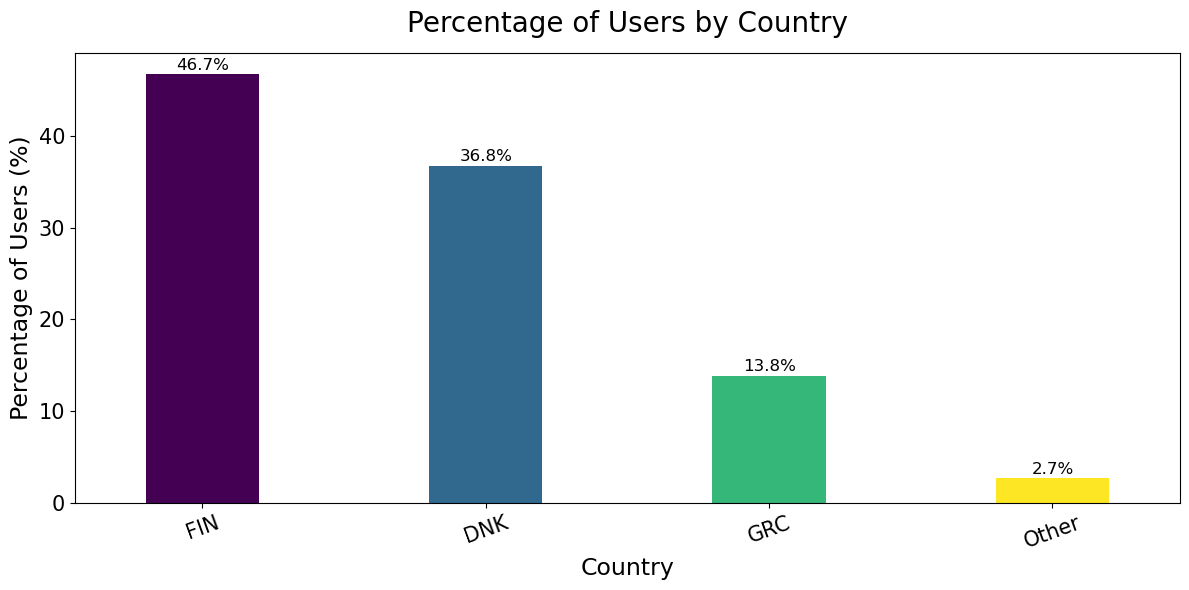

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from parsing import loadCsvData, findPath

# set which countries should supposedly be majority
validCountries = ["FIN", "DNK", "GRC"]

# load dataframe not parsed
df: pd.DataFrame = loadCsvData(findPath())

# copy dataframe
dfCopy = df.copy()

# join all other countries that are not in validCountries
dfCopy.loc[~dfCopy['REGISTRATION_COUNTRY'].isin(validCountries), \
		'REGISTRATION_COUNTRY'] = 'Other'

# count users by country and convert to percentages
countryCounts = dfCopy['REGISTRATION_COUNTRY'].value_counts()
countryPercentages = countryCounts / countryCounts.sum() * 100

# sort values
countryPercentages = countryPercentages.sort_values(ascending=False)

# plot
plt.figure(figsize=(12,6))
countryPercentages.plot(kind='bar', width=0.4, color=plt.cm.viridis(np.linspace(0, 1, len(countryPercentages))))
plt.title('Percentage of Users by Country', fontsize=20, pad=15)
plt.xlabel('Country', fontsize=17)
plt.ylabel('Percentage of Users (%)', fontsize=17)
plt.xticks(rotation=20, size=15)
plt.yticks(size=15)

# Add percentage labels on top of each bar
for i, v in enumerate(countryPercentages):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.show() 

### *Preferred devices?*

Among all registered clients, `web` users seem to be less preferred overall and in percentage of users. However, if you consider only consider this and assume that "if they are a minority, we should focus on the majority", you could not be more wrong.

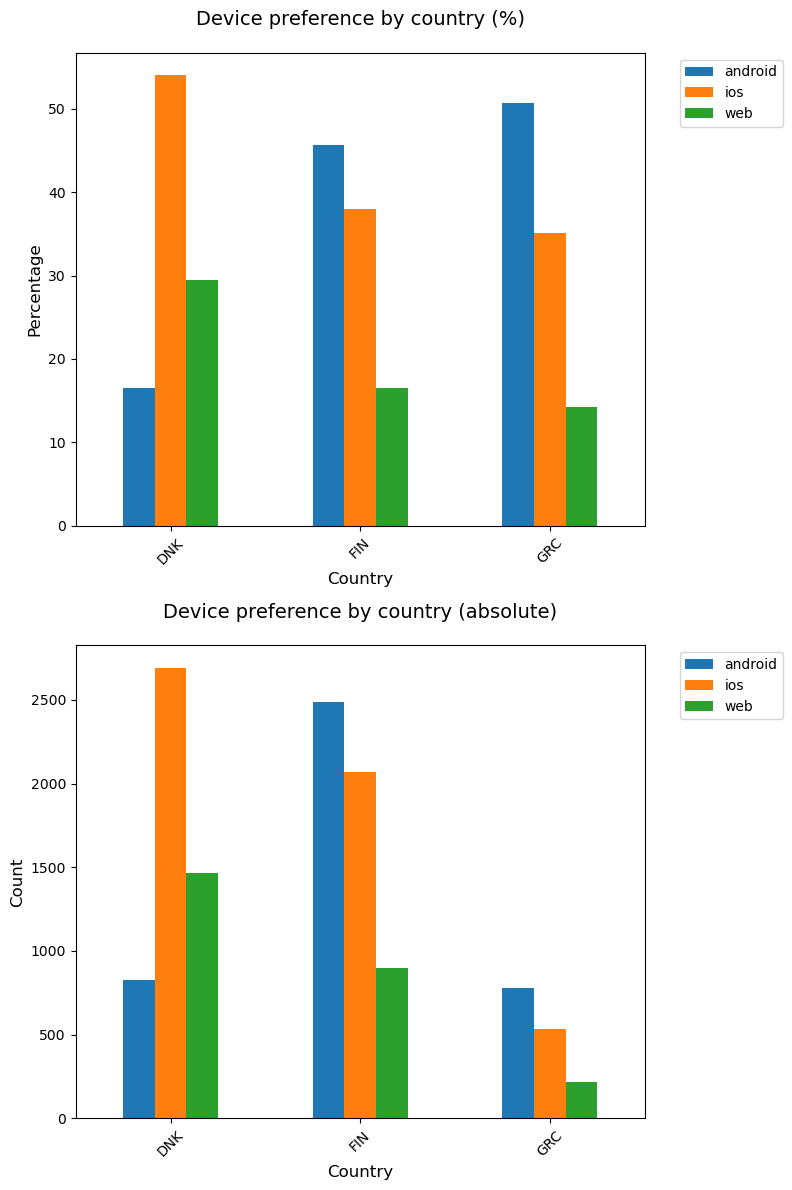

In [2]:
from parsing import parseDf
from osCountry import osPlot

# plot users OS by country
df = parseDf()
osPlot(df)

### *Web users purchase pattern*

In average, be it mean or median values, `web` users are as profitable group as `iOS` or `Android` users. That is true within maximum AND minimum values that they spend!

In other words, `web` users spend as much or more money in their smallest and biggest purchases.

In [3]:
from osSpending import minMaxPurchase, plotPurchaseTable

df = parseDf()

# Uncomment one of two lines to see 
minMaxPurchase(df, "min")
# minMaxPurchase(df, "max")

# Uncomment the lines below to see the tables in high contrast and bigger font
# maxDataFrame = minMaxPurchase(df, "max")
# minDataFrame = minMaxPurchase(df, "min")
# plotPurchaseTable(maxDataFrame, "(MAX_PURCHASE_VALUE_EUR)")
# plotPurchaseTable(minDataFrame, "(MIN_PURCHASE_VALUE_EUR)")

min


,web,ios,android
mean (€),29.51,24.39,21.31
median (€),23.32,19.27,18.25
25th percentile (€),16.22,14.20,13.18
75th percentile (€),35.49,30.42,26.36


### *Conversion rate*

What is "conversion rate" here? What does it mean to "convert"? It means how long it takes from the day that they register to their first purchase.

Not only they spend more, or as much, but `web` users are a "sure shot". The `web` users are very likely to make their first purchase, instead of registering and never ever buying something.

Only **30%** of `web` never make a purchase, in comparison to **50.22%** of `Android` users! Therefore, if one would make investments to get new clients, the focus group should consist of those that use `web` platform.

In [4]:
import pandas as pd
from parsing import sliceByCountry
from conversionOs import conversionRate, conversionByOs

df = pd.read_csv('dataset_for_datascience_assignment.csv')
df = sliceByCountry(df)
conversionRate(df)

# Uncomment for bigger, higher contrast table
# conversionByOs(df)

,Total Users,Purchasers,Zero Purchasers,Conversion Rate (%),Zero Purchases (%)
PREFERRED_DEVICE,,,,,
android,8212,4088,4124,49.78,50.22
ios,9431,5294,4137,56.13,43.87
web,3693,2585,1108,70.00,30.00


### *Days until a first purchase*

`web` users also take way less time to start purchasing products from Wolt. The table below shows that they are huge early adopters and get their first purchase ealier than other platform users. 

In [5]:
from firstPurchase import firstPurchase, filterFirstPurchase, createBuckets

# plot users OS by country
df = parseDf()

# choose country
country = "ALL"

# insert new column `DAYS_TO_FIRST_PURCHASE`
newDfAddedColumn: pd.DataFrame = filterFirstPurchase(df)

# filter by selected country. This dataframe will still contain 
# most of the original columns
if country != "ALL":
	filteredDf = newDfAddedColumn[newDfAddedColumn['REGISTRATION_COUNTRY'] == country]
else:
	filteredDf = newDfAddedColumn.copy()

createBuckets(filteredDf)

# # Uncomment the code below to see a table with high contrast and bigger font
# # Don't forget to comment the code above to avoid confusion

# # plot users OS by country
# df = parseDf()

# # the function below can take two arugments, the second one is the ISO of the three
# # main countries
# firstPurchase(df)
# firstPurchase(df, "DNK")

,web,ios,android
PURCHASE_TIME_BUCKET,,,
Same day,73.04%,43.38%,40.56%
1-7 days,4.67%,7.9%,10.12%
8-14 days,1.91%,3.23%,4.2%
15-30 days,2.8%,5.53%,4.72%
31-60 days,2.3%,6.44%,5.23%
61-90 days,1.75%,4.58%,4.2%
91-180 days,4.95%,9.67%,9.56%
181-365 days,7.05%,15.84%,17.34%
365+ days,1.52%,3.44%,4.08%


### *Relationship between early and late adopters*

As we understand that earlier adopters seem to spend more money. The below scatterplot shows us that the longer it takes for an user to engage in his/her first purchase, the less likely they are to spend money overall.

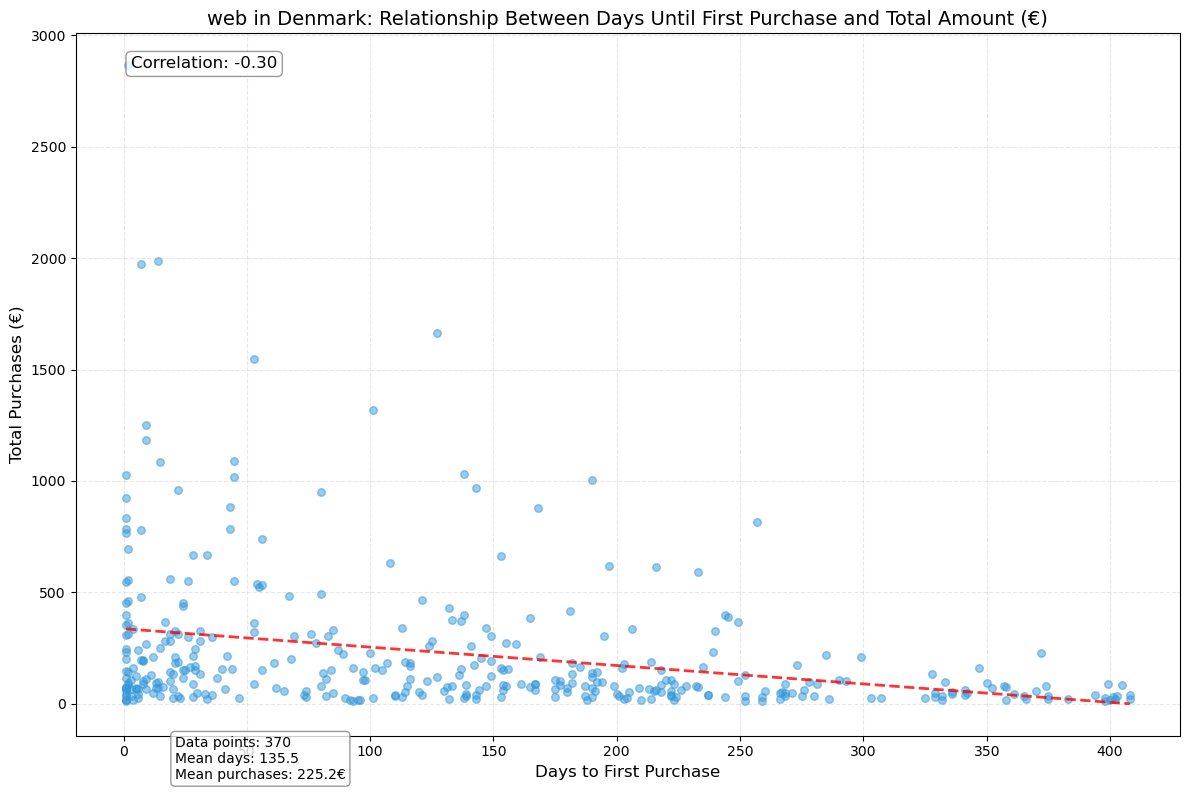

In [6]:
from osSpending import scatterPlotTotalPurchases
from parsing import parseDf

dataframe = parseDf()

country = "DNK"

platform = "web"

# If you want to visualize the pattern across OS'
# add the following second argument strings: 
# android, ios, or web 
# e.g. scatterPlotTotalPurchases(dataframe, "ios")
# scatterPlotTotalPurchases(dataframe)
scatterPlotTotalPurchases(dataframe, platform, country)

In [7]:
from firstAndLast import diffBetweenFirstAndLastPurchase, tableDiffFirstAndLast
from parsing import parseDf

df = parseDf()

diffBetweenFirstAndLastPurchase(df)

# Uncomment below for bigger high contrast table
# tableDiffFirstAndLast(stats)

,web,ios,android
Total Users,2585,5294,4088
Mean Active Period,158.47,148.41,141.75
Median Active Period,99.0,95.0,77.0
Single Day Users,36.09%,34.32%,35.2%
Maximum Active Period,426.0,426.0,425.0


### *What is the relation between ?*

There is a moderate positive correlation (0.45-0.50) between activity period length and purchase count across all devices. This means users who remain active for longer tend to make more purchases. The correlation is slightly stronger for mobile users than for web users.

In [ ]:
from firstAndLast import activityPeriodCorrelation
from parsing import parseDf

# Change to None to view all countries. Options: DNK, FIN, GRC.
country = "DNK"

df = parseDf()
activityPeriodCorrelation(df, country)

Denmark


,Correlation,Mean Active Period,Mean Purchases
web,0.52,164.06,6.08
ios,0.53,149.51,5.50
android,0.55,136.78,5.45


### *Where should we start?*

Denmark seems to be 

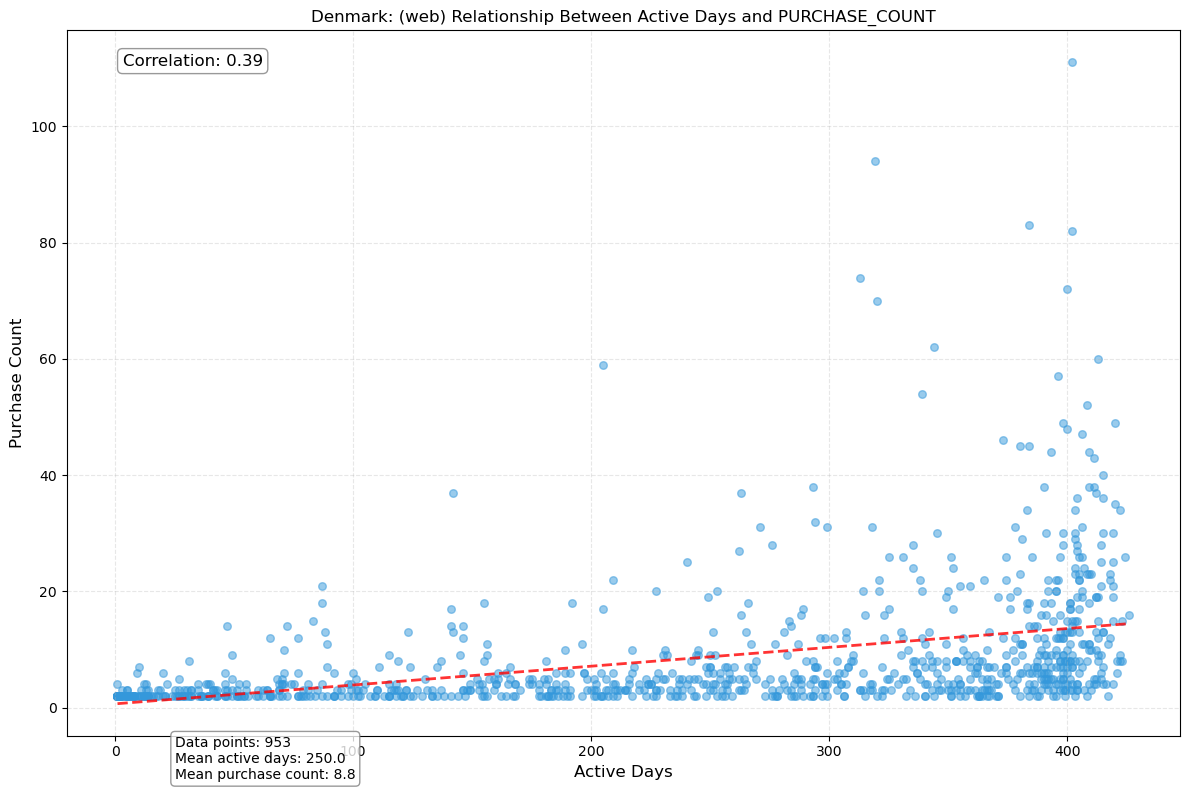

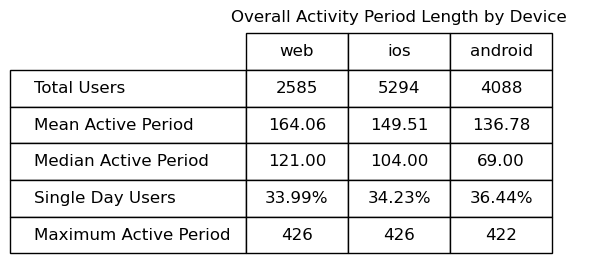

In [ ]:
from firstAndLast import scatterPlotActivityPeriod
from parsing import parseDf

df = parseDf()

# Change to None to view all countries. Options: DNK, FIN, GRC.
country = "DNK"

# Change to None to view all platforms. Options: web, android, ios.
platform = "web"

scatterPlotActivityPeriod(df, 'PURCHASE_COUNT', country, platform)
statsDf = diffBetweenFirstAndLastPurchase(df, country)
tableDiffFirstAndLast(statsDf)

# you can view all platforms and all countries by uncommenting the function below
# scatterPlotActivityPeriod(df, 'PURCHASE_COUNT')


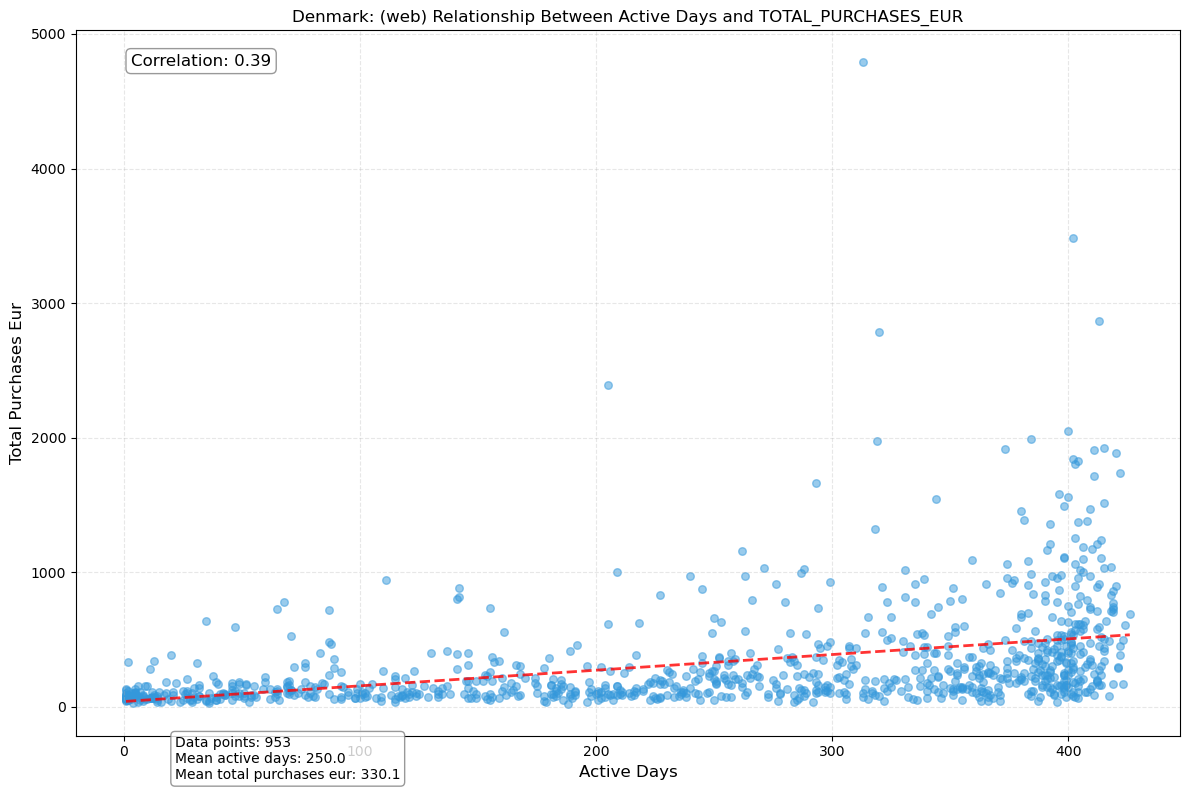

In [ ]:
from firstAndLast import scatterPlotActivityPeriod
from parsing import parseDf

df = parseDf()

# Change to None to view all countries. Options: DNK, FIN, GRC.
country = "DNK"

# Change to None to view all platforms. Options: web, android, ios.
platform = "web"

# you can view all platforms and all countries by uncommenting the function below
# scatterPlotActivityPeriod(df, 'TOTAL_PURCHASES_EUR')

scatterPlotActivityPeriod(df, 'TOTAL_PURCHASES_EUR', country, platform)

#### *Extras: Parsing*

Below one can see how and what was has been parsed out of the dataframe *df*. We retrieve the csv file that contains our dataset in *findPath()* which can be used inside `loadCsvData()` to get the data faster. 

After that we follow with parsing:

- `sliceByCountry()`: we slice the dataframe taking away countries that are not `FIN`, `DNK`, and `GRC` that compose majority of the dataset;
  
- `sliceByValidDevice()`: we slice for valid devices. Even though ios, android, and web are the only platforms in the dataset, it is a good way to certify that in the future we can replicate this report with minimum changes;
  
- `removeZeroPurchaseCount()`: remove values that equal zero in column `PURCHASE_COUNT`;
  
- `removeNaTotalPurchase()`: remove values that equal NA/na/NaN in column `TOTAL_PURCHASES_EUR`;
  
- `removeZeroTotalPurchase()`: remove values that equal zero in column `TOTAL_PURCHASES_EUR`;
  
- `parsingDf()`: main point of entry. Call this function for retrieve the parsed dataframe from anywhere within the code.

In [11]:
import pandas as pd
import os

validDevices = ["ios", "android", "web"]

def findPath():
	"""
	This function returns the directory of the script and csv file
	
	:Returns: 
	filePath
		the path to the `.csv` file
	"""
	directoryPath = os.path.dirname(os.path.abspath(__file__))
	filePath = os.path.join(directoryPath, "dataset_for_datascience_assignment.csv")
	return filePath

def loadCsvData(file_path) -> pd.DataFrame:
	"""
	Storage of csv in a pandas data type for wrangling
	
	:Parameters:
	file_path
		the path to the `.csv` file with our data
	
	:Returns: 
		pd.DataFrame parsed dataframe
	"""
	df: pd.DataFrame = pd.read_csv(file_path)
	return df

def sliceByCountry(df: pd.DataFrame) -> pd.DataFrame:
	"""
	Slice dataframe by selected countries. Considering that FIN, DNK, and GRC
	consist of 97% of the dataset, we will slice only these countries
	
	:Parameters:
	dataframe
		pd.DataFrame
	
	:Returns:
	df
		pd.DataFrame parsed dataframe
	"""
	countries = ['FIN', 'DNK', 'GRC']
	return df[df['REGISTRATION_COUNTRY'].isin(countries)]

def removeZeroPurchaseCount(df: pd.DataFrame) -> pd.DataFrame:
	"""
	Function to remove rows that contain '0' in the `PURCHASE_COUNT` column

	:Returns:
	df
		pd.DataFrame parsed dataframe
	"""
	return df[df['PURCHASE_COUNT'] > 0]

def removeNaTotalPurchase(df: pd.DataFrame) -> pd.DataFrame:
	"""
	Function to remove rows that contain NA/na/NaN in the `TOTAL_PURCHASES_EUR` column

	:Returns:
	df
		pd.DataFrame parsed dataframe
	"""
	return df[~df['TOTAL_PURCHASES_EUR'].isna()]

def removeZeroTotalPurchase(df: pd.DataFrame) -> pd.DataFrame:
	"""
	Function to remove rows that contain '0' in the `TOTAL_PURCHASES_EUR` column

	:Returns:
	df
		pd.DataFrame parsed dataframe
	"""
	return df[df['TOTAL_PURCHASES_EUR'] > 0]

def sliceByValidDevice(df: pd.DataFrame) -> pd.DataFrame:
	"""
	Function to slice off rows that contain other devices that are not
	android, ios, and web.

	:Returns:
	df
		pd.DataFrame parsed dataframe
	"""
	return df[df['PREFERRED_DEVICE'].isin(validDevices)]

def parseDf():
	"""
	Point of entry for parsing dataframe. If one desires to add further parsing,
	one can add `.pipe()` to the return value with the corresponding new function
	removing or adding columns.
	
	:Returns:
	df
		pd.DataFrame completely parsed dataframe
	"""
	return (loadCsvData(findPath())
			.pipe(sliceByCountry)
			.pipe(sliceByValidDevice)
			.pipe(removeZeroPurchaseCount)
			.pipe(removeNaTotalPurchase)
			.pipe(removeZeroTotalPurchase))
